In [1]:
% load_ext autoreload
% autoreload 2

In [2]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [4]:
from fix_scatter import *

In [18]:
plt.close()
plt.tight_layout
f=[0,0,0]
for trial in range(3):
    f[trial], axarr = plt.subplots(3, 4,  figsize=(32, 24), dpi=160)

    A=dict()
    i=0
    for cond in Health:
        
        for exp in range(1,5):
            dat = EyeDat(cond,exp,trial)        
            A[cond+str(exp)+str(trial)] = dat.plot(axarr[i,exp-1])
        i+=1
    plt.savefig("Trial"+ str(trial+1))

/home/ashedko/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/ashedko/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ashedko/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/ashedko/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ashedko/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
?plt.savefig

In [ ]:
from multiprocessing import Process, Value, Array

def f(n, a):
    n.value = 3.1415927
    for i in range(len(a)):
        a[i] = -a[i]

if __name__ == '__main__':
    num = Value('d', 0.0)
    arr = Array('i', range(10))

    p = Process(target=f, args=(num, arr))
    p.start()
    p.join()

    print num.value
    print arr[:]

In [229]:
self = dat
axis = plt.subplot()
X = self.disps
y = self.df["CURRENT_FIX_DURATION"]

axis.scatter(X,y, s = 4)
axis.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axis.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
if self.exp == 1 : axis.set_ylabel(self.health)
if self.health == "Во время лечения" : axis.set_xlabel("Эксперимент "+ str(self.exp))

clf = BayesianRidge()
clf.fit(np.nan_to_num(np.matrix(X).transpose()), np.asarray(y))
L=np.linspace(1,max(X))
axis.plot(L,[clf.predict(x) for x in L],'r')
len(y)

5386

In [192]:
y = y.dropna()
len(y)

5386

In [223]:
ps = A['До лечения1'],A[Health[2]+'4']
X,y = ps[1]
y_ = np.asarray(y)
np.any(np.isnan(X))

True

In [60]:
from scipy import stats

from sklearn.linear_model import BayesianRidge

In [224]:
plt.close()
f,axes = plt.subplots(1,2)
for p,ax in zip(ps,axes):
    ar = np.asarray(p)
#     ar.sort(axis=0)
    ax.scatter(ar[0],ar[1])
    X,y = np.matrix(ar[0])+0.00001,ar[1]+0.00001
#     X,y = p

    clf = BayesianRidge()
    clf.fit(np.nan_to_num(X.transpose()),y )
#     clf.fit(np.matrix(X).transpose(), y)
    L=np.linspace(1,400)
    ax.plot(L,[clf.predict(x)for x in L],'r')

plt.show()

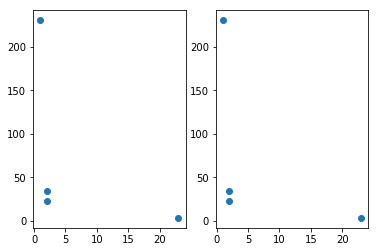

In [111]:
f,ax = plt.subplots(1,2)
for a in ax:
    a.scatter([1,2,23,2],[231,34,3,23])
f

In [79]:
for cond in Health:
    for exp in range(4):
        print(cond + str(exp))

Без заикания0
Без заикания1
Без заикания2
Без заикания3
Во время лечения0
Во время лечения1
Во время лечения2
Во время лечения3
До лечения0
До лечения1
До лечения2
До лечения3


In [62]:
# glob.glob("./Eyetrack/Без заикания/633*/Simp*_4*")
conv = lambda x: float(x.replace(',','.'))
dat = pd.read_csv(glob.glob("./*/Без заикания/633*/Simp*_4*")[0], sep='\t')
d = dat[["LEFT_GAZE_X","LEFT_GAZE_Y"]][1:10]
d = np.asarray(d.apply(lambda x: x.str.replace(",",".")).astype(float))
np.std(dists(d))

2.7175476459781658

In [82]:
dat = pd.read_csv(glob.glob("./*/Без заикания/633*/Fix*_4*")[0], delim_whitespace=1,decimal=',',usecols=["CURRENT_FIX_START","CURRENT_FIX_END","CURRENT_FIX_X","CURRENT_FIX_Y","CURRENT_FIX_DURATION"])
dat

,CURRENT_FIX_START,CURRENT_FIX_END,CURRENT_FIX_DURATION,CURRENT_FIX_X,CURRENT_FIX_Y
0,2.0,310.0,310.0,413.9,528.7
1,330.0,370.0,42.0,474.6,420.7
2,408.0,564.0,158.0,617.5,391.6
3,590.0,728.0,140.0,345.3,390.4
4,786.0,926.0,142.0,892.5,381.7
5,960.0,1392.0,434.0,1022.9,382.7
6,1436.0,1604.0,170.0,461.5,463.3
7,1640.0,1786.0,148.0,349.6,480.5
8,1824.0,2150.0,328.0,646.4,495.4
9,2198.0,2372.0,176.0,963.2,488.8


In [160]:
dat = pd.read_csv(glob.glob("./*/Без заикания/633*/Sim*_4*")[0], delim_whitespace=1, decimal=',', usecols=["LEFT_GAZE_X","LEFT_GAZE_Y","RIGHT_GAZE_X","RIGHT_GAZE_Y"])
df = dat
df = df.loc[:, (df != '.').any(axis=0)]
df = df.stack().str.replace(',','.').unstack()
df0 = df[df[df.columns[0]]!='.'].astype(float)
len(dat)

240098

In [60]:
def dists(v):
    mean = np.mean(v)
    return [np.linalg.norm(x - mean) for x in v]

In [157]:
dat = pd.read_csv(glob.glob("./*/Без заикания/633*/Fix*_4*")[0], delim_whitespace=1, decimal=',')
df = dat[["CURRENT_FIX_START","CURRENT_FIX_END"]]
for i in df.itertuples():
    print(i[1])

2
330
408
590
786
960
1436
1640
1824
2198
2406
2594
3076
3682
4738
5458
6038
6444
7510
8980
10068
11058
11716
12464
12686
13246
13792
14344
15400
15690
16182
16602
17010
17724
18090
18770
19968
21016
21370
22036
22126
22340
22776
23166
23478
24358
25216
26126
26588
26848
27162
27748
28384
28848
29376
30336
31236
31426
32324
32546
33386
33456
33586
33996
34448
34966
35622
36232
36432
37064
38082
38570
39596
42278
42494
43030
43638
43866
44346
45334
45554
47408
48580
49982
50658
50892
51836
52194
54226
54522
54980
55548
56746
56952
57738
58178
59876
60404
60572
60762
60982
61154
61310
61650
62396
63446
63998
64408
65130
65910
66232
66806
67094
67632
67960
68406
69128
70988
71422
72012
72940
74180
74486
76122
76544
78484
80140
80452
80894
81332
82012
82590
83528
83878
84404
84734
85800
86968
87854
88272
89032
89718
90276
90326
90484
90636
90990
91746
91878
93092
93750
94068
94620
97646
97882
98352
99698
101718
101962
102454
102940
103266
103532
103916
106664
107210
107946
108164
108696
10